<a href="https://colab.research.google.com/github/Shreya111111/Machine-Learning/blob/main/PredictingDiabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from google.colab import files
import io
data = files.upload()

Saving diabetes.csv to diabetes.csv


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [ ]:
datafram =pd.read_csv(io.StringIO(data['diabetes.csv'].decode('utf-8')))

In [ ]:
datafram.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
datafram.tail(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
758,1,106,76,0,0,37.5,0.197,26,0
759,6,190,92,0,0,35.5,0.278,66,1
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
#total number of rows and columns in the dataset
datafram.shape

(768, 9)

In [ ]:
datafram.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
datafram.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


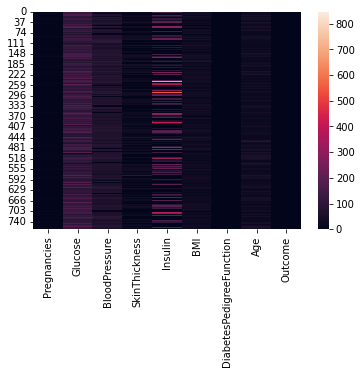

In [ ]:
sb.heatmap(datafram)

In [ ]:
datafram.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [ ]:
datafram.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

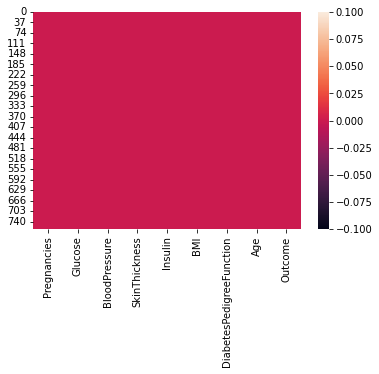

In [ ]:
sb.heatmap(datafram.isnull())

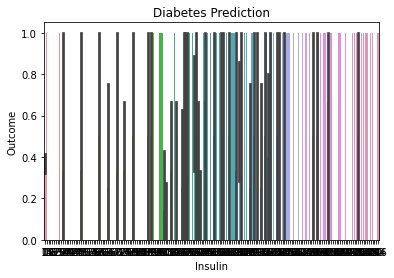

In [ ]:
sb.barplot(x='Insulin',y='Outcome',data=datafram)
plt.title('Diabetes Prediction')
plt.show()

In [ ]:
datafram['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
datafram['Insulin'].value_counts()

0      374
105     11
130      9
140      9
120      8
      ... 
73       1
171      1
255      1
52       1
112      1
Name: Insulin, Length: 186, dtype: int64

In [ ]:
from itertools import groupby
datafram.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [ ]:
datafram.groupby('Insulin').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,BMI,DiabetesPedigreeFunction,Age,Outcome
Insulin,,,,,,,,
0,4.433155,119.409091,67.473262,11.508021,30.943316,0.41534,35.796791,0.368984
14,0.000000,180.000000,78.000000,63.000000,59.400000,2.42000,25.000000,1.000000
15,2.000000,68.000000,62.000000,13.000000,20.100000,0.25700,23.000000,0.000000
16,2.000000,88.000000,58.000000,26.000000,28.400000,0.76600,22.000000,0.000000
18,2.000000,91.000000,65.000000,30.500000,36.450000,0.37400,23.000000,0.000000
...,...,...,...,...,...,...,...,...
579,1.000000,172.000000,68.000000,49.000000,42.400000,0.70200,28.000000,1.000000
600,8.000000,124.000000,76.000000,24.000000,28.700000,0.68700,52.000000,1.000000
680,0.000000,165.000000,90.000000,33.000000,52.300000,0.42700,23.000000,0.000000


In [ ]:
#separating data using drop 
X=datafram.drop(columns='Outcome',axis=1)
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
#separating label
Y=datafram['Outcome']
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


In [ ]:
#scaling using standard scaler
# s=x-min/max-min

In [ ]:
Standard_scaler=StandardScaler()
Standard_scaler.fit(X)

StandardScaler()

In [ ]:
data=Standard_scaler.transform(X)
print(data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
#after standardization
X=data
Y=datafram['Outcome']
print(X)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


TRAIN TEST SPLIT


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=2)
print(X.shape)

(768, 8)


In [ ]:
print(X_train.shape)
print(X_test.shape)

(614, 8)
(154, 8)


Training the Model using support vector machine

In [ ]:
classifier = svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)


SVC(kernel='linear')

Prediction


In [ ]:
x_pred=classifier.predict(X_train)
#accuracy score
training_accuracy=accuracy_score(x_pred,Y_train)

ACCURACY SCORE OF TRAINING DATA

In [ ]:
print('The accuracy score of training data is')
print(training_accuracy)

The accuracy score of training data is
0.7719869706840391


ACCURACY OF TEST DATA

In [ ]:
x_test_pred=classifier.predict(X_test)
test_accuracy=accuracy_score(x_test_pred,Y_test)
print('The accuracy score of test data is',test_accuracy)

The accuracy score of test data is 0.7662337662337663


Making a PREDICTION SYSTEM

In [ ]:
given_data = (500,166,72,1956,175,2565.8,0.587,515)
numpy_array = np.asarray(given_data)
reshape= numpy_array.reshape(1,-1)
std = StandardScaler().fit_transform(reshape)
print(std)

pred= classifier.predict(std)
print(pred)
if (pred[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')


[[0. 0. 0. 0. 0. 0. 0. 0.]]
[0]
The person is not diabetic
